In [1]:
# import basic package
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
import sklearn
import scipy

In [2]:
# import dataset
dataset = pd.read_csv('train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Pre-processing Steps

In [3]:
# part 1 - check missing data
dataset.isnull().sum()/len(dataset)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
dataset = dataset.drop(['Cabin'], axis=1)

dataset.isnull().sum()/len(dataset)*100

dataset.info()

In [5]:
# Age and Embarked
# Age - number - boxplot (check the outlier - found - medina, not found - mean)
# Embarked - charactor (mode - most frequent occurance)

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [9]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

dataset.isnull().sum()

<AxesSubplot:ylabel='Age'>

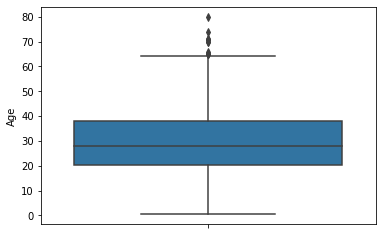

In [10]:
sns.boxplot(y='Age', data=dataset)

In [11]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

dataset.isnull().sum()

In [12]:
# part 2 - encoding part
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
dataset = dataset.drop(['PassengerId','Name','Ticket','Fare'], axis=1)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [15]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# Label Encoder
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Sex'] = dataset['Sex'].cat.codes

dataset['Embarked'] = dataset['Embarked'].astype('category')
dataset['Embarked'] = dataset['Embarked'].cat.codes

dataset.head()

In [18]:
# One Hot Encoder - 
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
dataset = pd.get_dummies(dataset, columns = ['Pclass','Embarked'])

In [20]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,0,1,22.0,1,0,0,0,1,0,0,1
1,1,0,38.0,1,0,1,0,0,1,0,0
2,1,0,26.0,0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,1,0,0,0,0,1
4,0,1,35.0,0,0,0,0,1,0,0,1


In [21]:
# Dummy variables
dataset = dataset.drop(['Pclass_3','Embarked_2'], axis=1 )

In [22]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_0,Embarked_1
0,0,1,22.0,1,0,0,0,0,0
1,1,0,38.0,1,0,1,0,1,0
2,1,0,26.0,0,0,0,0,0,0
3,1,0,35.0,1,0,1,0,0,0
4,0,1,35.0,0,0,0,0,0,0


In [23]:
# part 3 - handling outlier - not required 
dataset['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
# part 4 - feature scaling - not required since only age has continuous value and remaining have only binary value

In [25]:
# part 5 - check imbalance dataset (dependent variable) - it's balance dataset 
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Pre-processing part completed with training dataset

In [26]:
test = pd.read_csv('test.csv')

In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test_Id=test['PassengerId']

In [29]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
test = test.drop(['PassengerId','Name','Ticket','Fare'], axis=1)

In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.5,0,0,NaN,Q
1,3,female,47.0,1,0,NaN,S
2,2,male,62.0,0,0,NaN,Q
3,3,male,27.0,0,0,NaN,S
4,3,female,22.0,1,1,NaN,S


In [32]:
# pre-processing with test dataset (apply same method like training dataset)
test.isnull().sum()/ len(test)*100

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Cabin       78.229665
Embarked     0.000000
dtype: float64

In [33]:
test = test.drop(['Cabin'], axis=1)

In [34]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [35]:
test['Age'] = test['Age'].fillna(test['Age'].median())

In [36]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [37]:
# part 2 - encoding
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [38]:
# Label Encoder
test['Sex'] = test['Sex'].astype('category')
test['Sex'] = test['Sex'].cat.codes

test['Embarked'] = test['Embarked'].astype('category')
test['Embarked'] = test['Embarked'].cat.codes

In [39]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [40]:
# One Hot Encoder
test = pd.get_dummies(test, columns=['Pclass','Embarked'])

In [41]:
test.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,1,34.5,0,0,0,0,1,0,1,0
1,0,47.0,1,0,0,0,1,0,0,1
2,1,62.0,0,0,0,1,0,0,1,0
3,1,27.0,0,0,0,0,1,0,0,1
4,0,22.0,1,1,0,0,1,0,0,1


In [42]:
# dummy variable
test = test.drop(['Pclass_3','Embarked_2'], axis=1 )

In [43]:
test.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_0,Embarked_1
0,1,34.5,0,0,0,0,0,1
1,0,47.0,1,0,0,0,0,0
2,1,62.0,0,0,0,1,0,1
3,1,27.0,0,0,0,0,0,0
4,0,22.0,1,1,0,0,0,0


In [44]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_0,Embarked_1
0,0,1,22.0,1,0,0,0,0,0
1,1,0,38.0,1,0,1,0,1,0
2,1,0,26.0,0,0,0,0,0,0
3,1,0,35.0,1,0,1,0,0,0
4,0,1,35.0,0,0,0,0,0,0


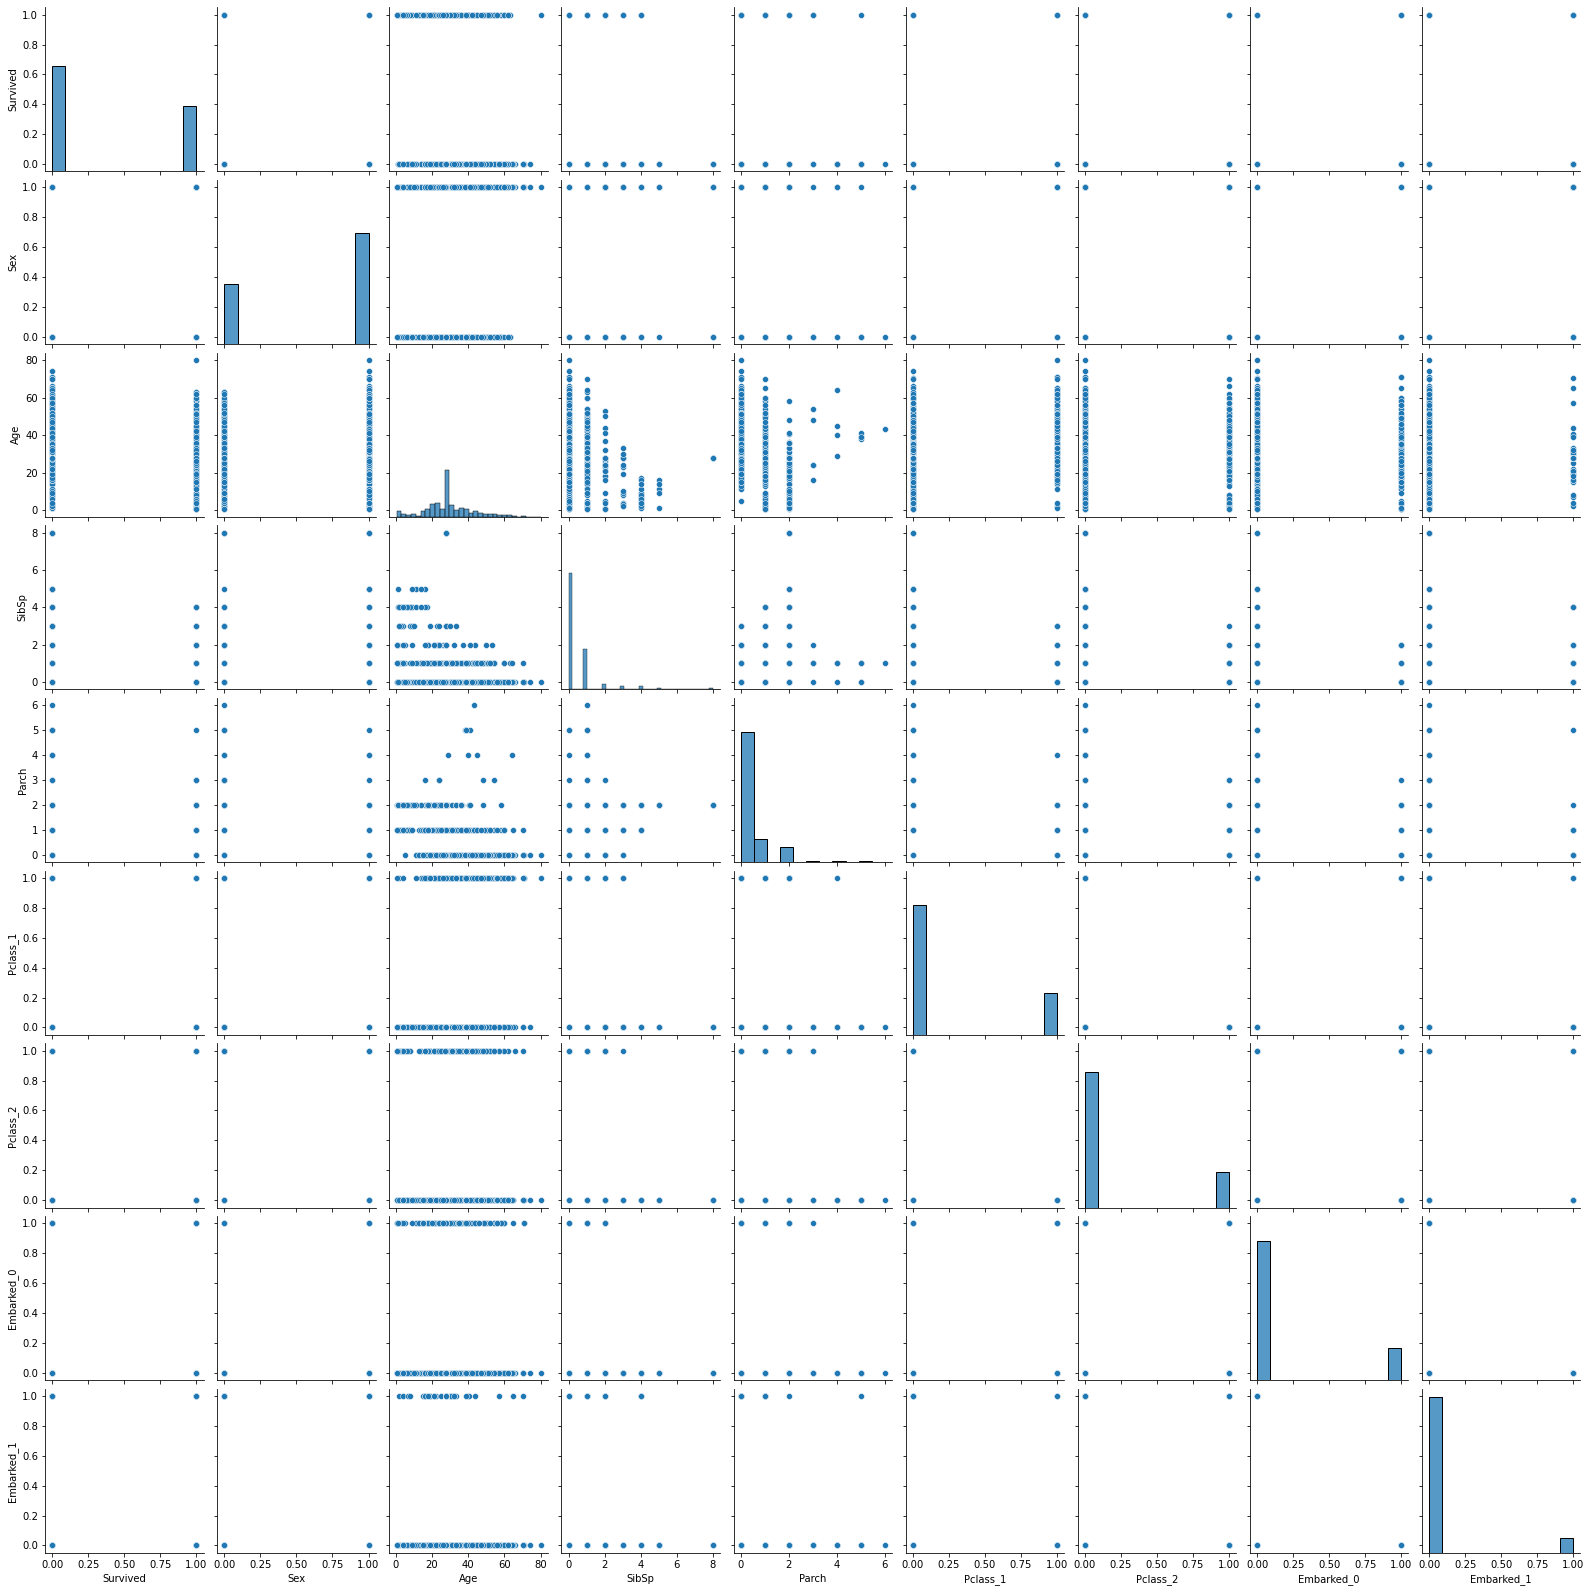

In [45]:
# EDA part
sns.pairplot(dataset)

<AxesSubplot:>

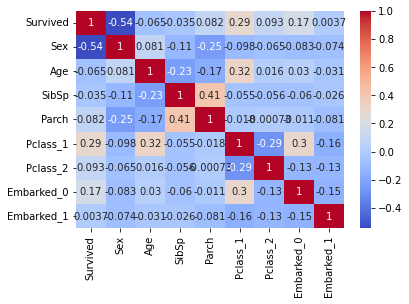

In [46]:
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

# Split the data into training and test

In [47]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_0,Embarked_1
0,0,1,22.0,1,0,0,0,0,0
1,1,0,38.0,1,0,1,0,1,0
2,1,0,26.0,0,0,0,0,0,0
3,1,0,35.0,1,0,1,0,0,0
4,0,1,35.0,0,0,0,0,0,0


In [105]:
x = dataset.iloc[:,1:]
y = dataset['Survived']

In [49]:
x.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_0,Embarked_1
0,1,22.0,1,0,0,0,0,0
1,0,38.0,1,0,1,0,1,0
2,0,26.0,0,0,0,0,0,0
3,0,35.0,1,0,1,0,0,0
4,1,35.0,0,0,0,0,0,0


In [50]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [51]:
# Split the data into training and test for building the model and prediction
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=111)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 8)
(268, 8)
(623,)
(268,)


In [52]:
x_train

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Embarked_0,Embarked_1
195,0,58.0,0,0,1,0,1,0
150,1,51.0,0,0,0,1,0,0
572,1,36.0,0,0,1,0,0,0
134,1,25.0,0,0,0,1,0,0
96,1,71.0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
275,0,63.0,1,0,1,0,0,0
86,1,16.0,1,3,0,0,0,0
724,1,27.0,1,0,1,0,0,0
876,1,20.0,0,0,0,0,0,0


# Build Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [54]:
logit_model.intercept_

array([1.5393257])

In [55]:
logit_model.coef_

array([[-2.57199297, -0.03555552, -0.30737905,  0.02471086,  1.98564423,
         0.95576506,  0.1865681 ,  0.22124071]])

# Prediction with train and test dataset to check accuracy, high bias and high variance

In [56]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

# Evaluation matrix (confusion matrix, classification report, accuracy score)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [58]:
print(confusion_matrix(y_train, y_pred_train))
print("###########"*10)
print(confusion_matrix(y_test, y_pred_test))

[[325  53]
 [ 71 174]]
##############################################################################################################
[[146  25]
 [ 32  65]]


In [59]:
print(classification_report(y_train, y_pred_train))
print("###########"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       378
           1       0.77      0.71      0.74       245

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.79       623
weighted avg       0.80      0.80      0.80       623

##############################################################################################################
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       171
           1       0.72      0.67      0.70        97

    accuracy                           0.79       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.79      0.79       268



In [60]:
print("Training Accuracy Score :",accuracy_score(y_train, y_pred_train))
print("###########"*10)
print("Test Accuracy Score :",accuracy_score(y_test, y_pred_test))

Training Accuracy Score : 0.8009630818619583
##############################################################################################################
Test Accuracy Score : 0.7873134328358209


# ROC and AUC

In [61]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7619521311870742

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

In [63]:
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.14619883, 1.        ])

array([0.        , 0.67010309, 1.        ])

array([2, 1, 0], dtype=int64)

# plot for ROC and AUC

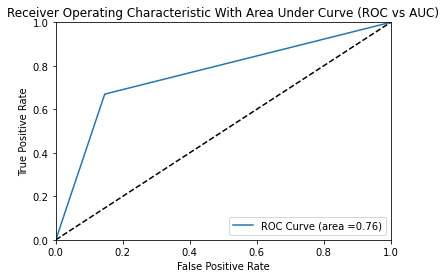

In [64]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve (area =%0.2f)' % logistic_roc_auc )
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic With Area Under Curve (ROC vs AUC)")
plt.legend(loc ='lower right')
plt.show()

# Final Part
#### Now, we have to predict test data and find whether customer will Survived or not

In [65]:
final_output = logit_model.predict(test)

In [66]:
# append the output into test dataset
gender_submission = pd.concat([test_Id, pd.DataFrame(final_output)], axis=1)

In [67]:
gender_submission.columns
new_columns = ['PassengerId' ,'Survived']

In [68]:
gender_submission.columns = new_columns

In [69]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


test1.head()

In [70]:
# final step to share the dataset with your client/stakeholder
gender_submission.to_csv('gender_submission.csv',index=None)

### Maxium Liklihood Estimator Algorithm

In [71]:
import statsmodels.api as sm
logisticRegression =sm.Logit(y_test , x_test)


# cross validation k-fold method

In [111]:
from sklearn.model_selection import cross_val_score
train_accurecy=cross_val_score(logit_model,x_train,y_train,cv=15)
test_accurecy=cross_val_score(logit_model,x_test,y_test,cv=15)

In [114]:
train_accurecy.mean()

0.8058072009291523

In [112]:
print(train_accurecy)

[0.88095238 0.76190476 0.78571429 0.83333333 0.69047619 0.9047619
 0.78571429 0.78571429 0.70731707 0.90243902 0.82926829 0.7804878
 0.85365854 0.68292683 0.90243902]


In [113]:
print(test_accurecy)

[0.83333333 0.88888889 0.88888889 0.61111111 0.77777778 0.83333333
 0.77777778 0.72222222 0.83333333 0.77777778 0.83333333 0.55555556
 0.66666667 0.70588235 0.82352941]
